In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lsay-dataset/30263-0001-Data.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
# Load the dataset
data = pd.read_csv('/kaggle/input/lsay-dataset/30263-0001-Data.csv')

# Display the first few rows
print(data.head())


   CASENUM  COHORT  SCHOOLID  STRATA  ASCICLS  ASCITCH  ASTSEX  AMTHCLS  \
0     1001       1       309       6      -95      -95     -95      -95   
1     1002       2       132      11   132032    13203       1   132061   
2     1003       1       309       6      -95      -95     -95      -95   
3     1004       2       126       8   126026    12602       2   126101   
4     1005       2       133      11      -99      -99     -99   133024   

   AMTHTCH  AMTSEX  ...  PEDUC3  MEDSRCE  FEDSRCE  MOTHOCC  FATHOCC  POCI  \
0      -95     -95  ...       1        2        3      395      785     0   
1    13206       2  ...       4        7        7      -99      -99   -99   
2      -95     -95  ...       1        3        2      988      535     0   
3    12610       2  ...       1        8        8      270      331     0   
4    13302       1  ...       4        3        7       65      471     0   

   FOCCSRCE  MOCCSRCE  MOTHSEI  FATHSEI  
0         5         4       34       15  
1 

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of important variables for each subject
important_vars = [
    'ABMTHA', 'ABMTHC', 'ABMTHD', 'ABMTHE', 'ABMTHF', 'ABMTHG', 'ABMTHH', 'ABMTHI', 'ABMTHJ',
    'ABSCIA', 'ABSCIC', 'ABSCID', 'ABSCIE', 'ABSCIF', 'ABSCIG', 'ABSCIH', 'ABSCII', 'ABSCIJ',
    'ABENG1A', 'ABENG1C', 'ABENG1D', 'ABENG1E', 'ABENG1F', 'ABENG1G', 'ABENG1H', 'ABENG1I', 'ABENG1J',
    'ABENG2A', 'ABENG2C', 'ABENG2D', 'ABENG2E', 'ABENG2F', 'ABENG2G', 'ABENG2H', 'ABENG2I', 'ABENG2J',
    'ABSSTA', 'ABSSTC', 'ABSSTD', 'ABSSTE', 'ABSSTF', 'ABSSTG', 'ABSSTH', 'ABSSTI', 'ABSSTJ',
    'ABCOMA', 'ABCOMC', 'ABCOMD', 'ABCOME', 'ABCOMF', 'ABCOMG', 'ABCOMH', 'ABCOMI', 'ABCOMJ',
    'ABFORA', 'ABFORC', 'ABFORD', 'ABFORE', 'ABFORF', 'ABFORG', 'ABFORH', 'ABFORI', 'ABFORJ',
    'ABARTA', 'ABARTC', 'ABARTD', 'ABARTE', 'ABARTF', 'ABARTG', 'ABARTH', 'ABARTI', 'ABARTJ',
    'ABMUSA', 'ABMUSC', 'ABMUSD', 'ABMUSE', 'ABMUSF', 'ABMUSG', 'ABMUSH', 'ABMUSI', 'ABMUSJ',
    'ABVOCA', 'ABVOCC', 'ABVOCD', 'ABVOCE', 'ABVOCF', 'ABVOCG', 'ABVOCH', 'ABVOCI', 'ABVOCJ'
    # Add similar variables for other subjects like English, Social Studies, etc.
]

# Filter the dataset to include only the important variables
filtered_data = data[important_vars].copy()  # Ensure a copy is made

# Encode categorical variables
label_encoders = {}
for column in filtered_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column].astype(str))

# Handle missing values (e.g., fill with the median value)
filtered_data = filtered_data.fillna(filtered_data.median())


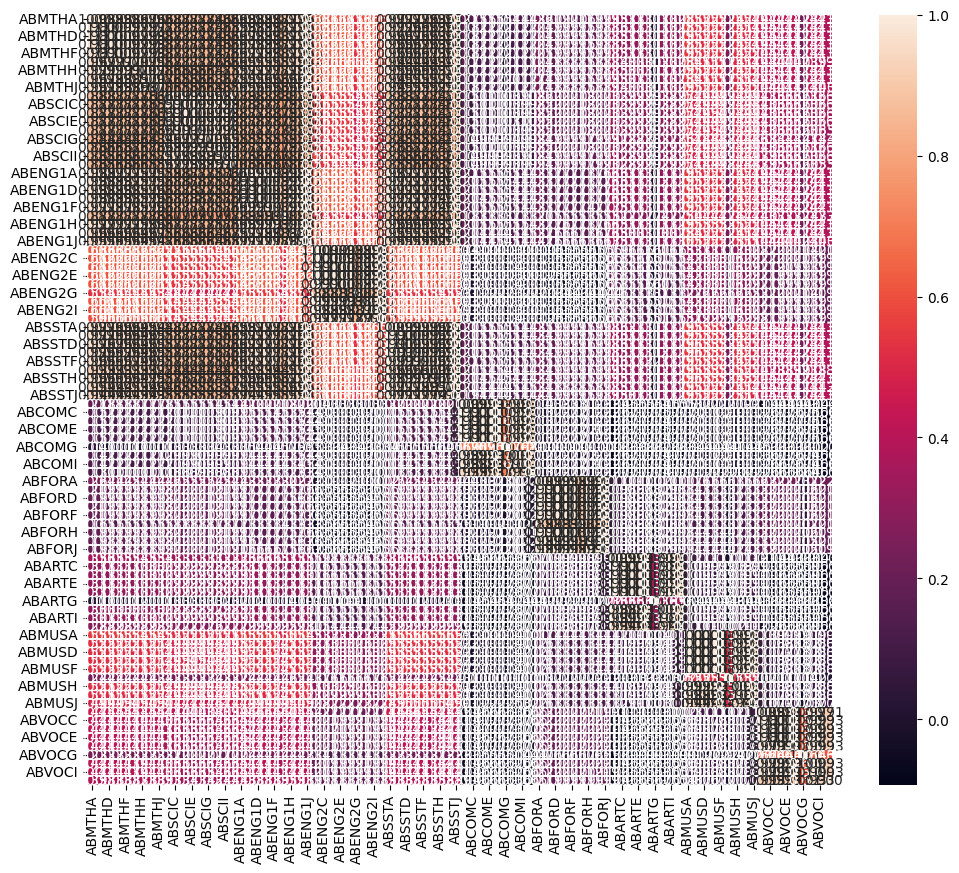

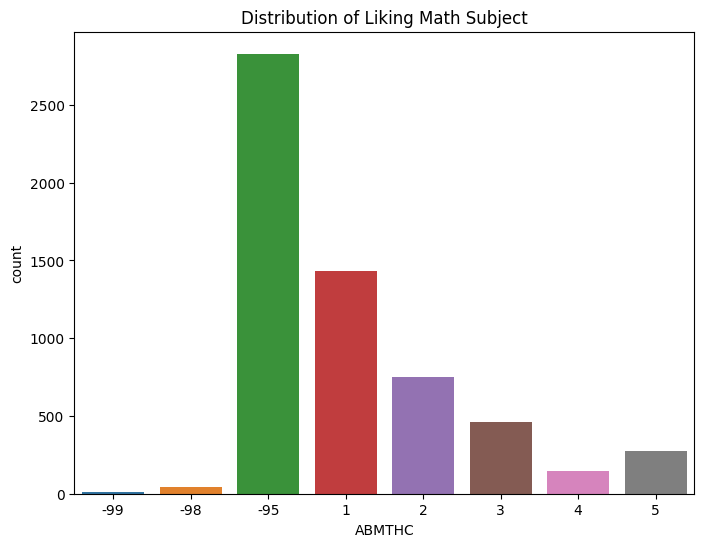

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f")
plt.show()

# Distribution of ratings for a particular subject
plt.figure(figsize=(8, 6))
sns.countplot(x='ABMTHC', data=filtered_data)
plt.title('Distribution of Liking Math Subject')
plt.show()


In [13]:
# Example: Predicting if students like Math (ABMTHC)
X = filtered_data.drop('ABMTHC', axis=1)
y = filtered_data['ABMTHC']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


[[  1   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   1   0 268  22   3   1   2]
 [  0   1   0  93  53  10   0   4]
 [  0   0   0  37  24  13   0   3]
 [  0   0   0   9  11   6   0   0]
 [  0   0   0  27   4   0   0  14]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00         1
         -98       0.75      1.00      0.86         6
         -95       1.00      1.00      1.00       576
           1       0.62      0.90      0.73       297
           2       0.46      0.33      0.39       161
           3       0.41      0.17      0.24        77
           4       0.00      0.00      0.00        26
           5       0.61      0.31      0.41        45

    accuracy                           0.78      1189
   macro avg       0.61      0.59      0.58      1189
weighted avg       0.76      0.78      0.76      1189

Accuracy: 0.78


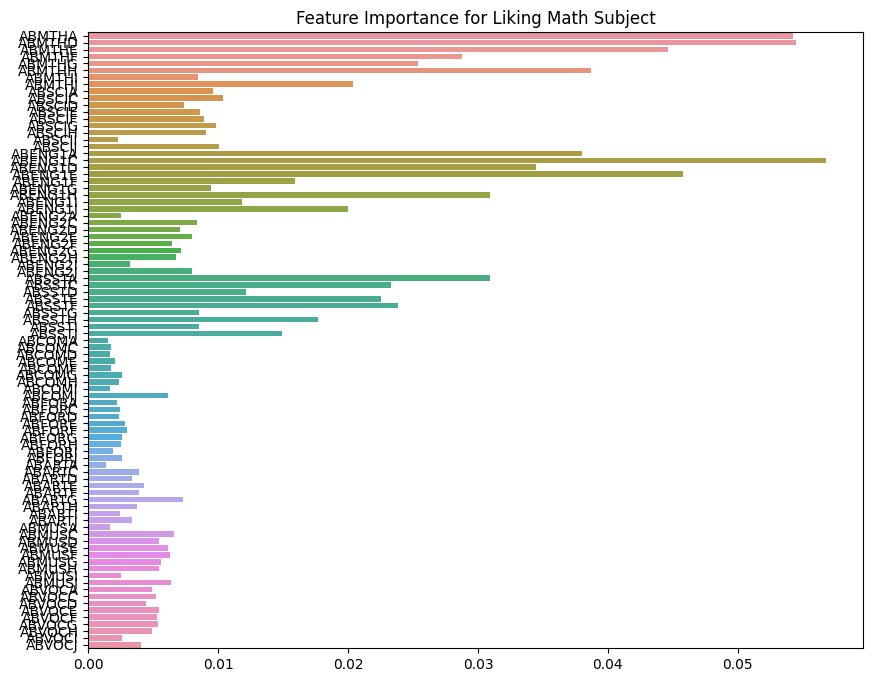

In [14]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Liking Math Subject')
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
subject_vars = {
    'Math': ['ABMTHA', 'ABMTHC', 'ABMTHD', 'ABMTHE', 'ABMTHF', 'ABMTHG', 'ABMTHH', 'ABMTHI', 'ABMTHJ'],
    'Science': ['ABSCIA', 'ABSCIC', 'ABSCID', 'ABSCIE', 'ABSCIF', 'ABSCIG', 'ABSCIH'],
    # Add other subjects similarly
   'English Grammar':[ 'ABENG1A', 'ABENG1C', 'ABENG1D', 'ABENG1E', 'ABENG1F', 'ABENG1G', 'ABENG1H', 'ABENG1I', 'ABENG1J'],
    'English Litreature':['ABENG2A', 'ABENG2C', 'ABENG2D', 'ABENG2E', 'ABENG2F', 'ABENG2G', 'ABENG2H', 'ABENG2I', 'ABENG2J'],
    'Social Science':['ABSSTA', 'ABSSTC', 'ABSSTD', 'ABSSTE', 'ABSSTF', 'ABSSTG', 'ABSSTH', 'ABSSTI', 'ABSSTJ'],
  'Computer': [ 'ABCOMA', 'ABCOMC', 'ABCOMD', 'ABCOME', 'ABCOMF', 'ABCOMG', 'ABCOMH', 'ABCOMI', 'ABCOMJ'],
    'Foreign Language':['ABFORA', 'ABFORC', 'ABFORD', 'ABFORE', 'ABFORF', 'ABFORG', 'ABFORH', 'ABFORI', 'ABFORJ'],
    'Art':['ABARTA', 'ABARTC', 'ABARTD', 'ABARTE', 'ABARTF', 'ABARTG', 'ABARTH', 'ABARTI', 'ABARTJ'],
   'Music/Dance': ['ABMUSA', 'ABMUSC', 'ABMUSD', 'ABMUSE', 'ABMUSF', 'ABMUSG', 'ABMUSH', 'ABMUSI', 'ABMUSJ'],
    'Vocational/Commerce':['ABVOCA', 'ABVOCC', 'ABVOCD', 'ABVOCE', 'ABVOCF', 'ABVOCG', 'ABVOCH', 'ABVOCI', 'ABVOCJ']
}


In [19]:
def analyze_subject(data, subject, variables):
    # Filter the dataset to include only the important variables
    filtered_data = data[variables]

    # Encode categorical variables
    label_encoders = {}
    for column in filtered_data.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column].astype(str))

    # Handle missing values (e.g., fill with the median value)
    filtered_data.fillna(filtered_data.median(), inplace=True)

    # Define X and y
    X = filtered_data.drop(f'{variables[1]}', axis=1)
    y = filtered_data[f'{variables[1]}']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Evaluation
    print(f'--- {subject} Analysis ---')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Feature importance
    feature_importances = rf_model.feature_importances_
    features = X.columns

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importances, y=features)
    plt.title(f'Feature Importance for Liking {subject} Subject')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()


/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Math Analysis ---
[[  1   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   1   0 228  40  16   1  11]
 [  0   2   0  78  50  18   5   8]
 [  0   0   0  22  23  22   2   8]
 [  0   0   0   7   8   8   1   2]
 [  0   0   0  22   6   2   0  15]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00         1
         -98       0.67      1.00      0.80         6
         -95       1.00      1.00      1.00       576
           1       0.64      0.77      0.70       297
           2       0.39      0.31      0.35       161
           3       0.33      0.29      0.31        77
           4       0.11      0.04      0.06        26
           5       0.34      0.33      0.34        45

    accuracy                           0.76      1189
   macro avg       0.56      0.59      0.57      1189
weighted avg       0.74      0.76      0.74      1189

Accuracy: 0.76


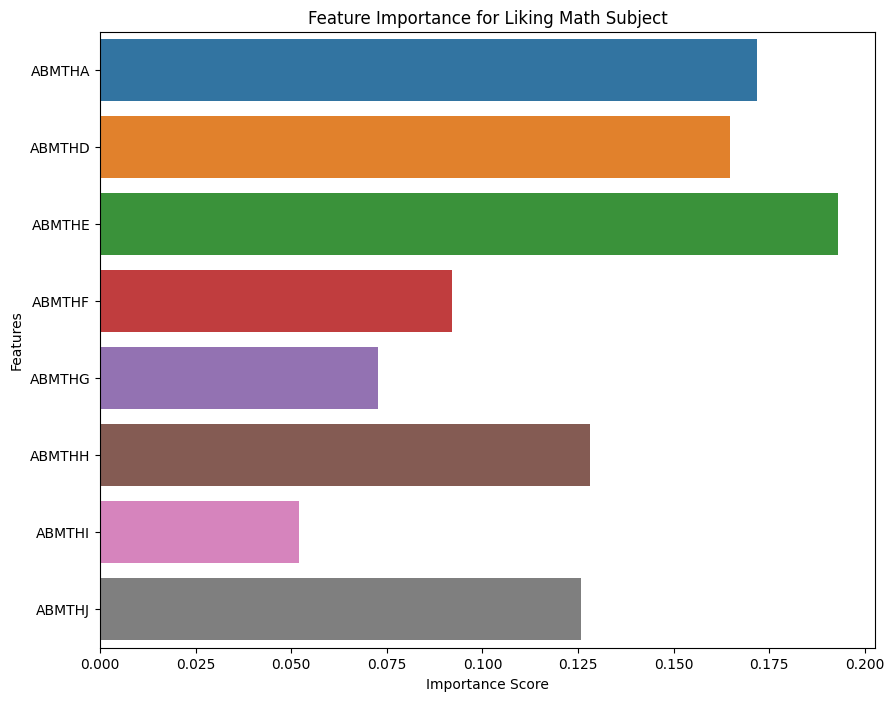

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Science Analysis ---
[[ 60   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 188  33  11   2   9]
 [  0   2   0  55  45  28   1   7]
 [  0   0   0  20  32  20   6   5]
 [  0   0   0   5  11   7   2   4]
 [  0   1   0  11  11   9   2  19]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00        60
         -98       0.50      1.00      0.67         5
         -95       1.00      1.00      1.00       576
           1       0.67      0.77      0.72       245
           2       0.34      0.33      0.33       138
           3       0.27      0.24      0.25        83
           4       0.15      0.07      0.10        29
           5       0.43      0.36      0.39        53

    accuracy                           0.77      1189
   macro avg       0.55      0.60      0.56      1189
weighted avg       0.76      0.77      0.76      1189

Accuracy: 0.77


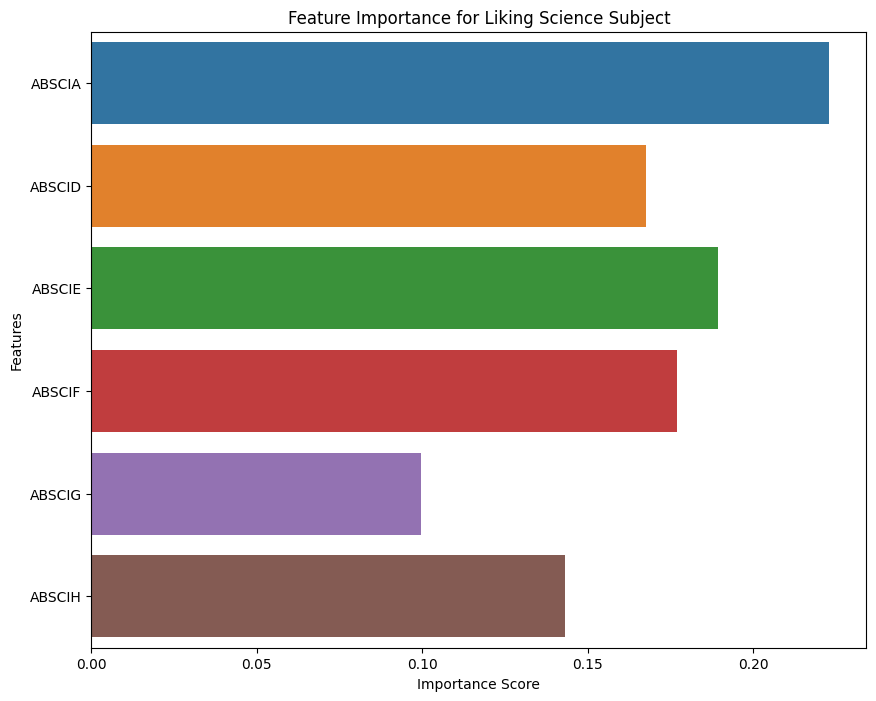

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- English Grammar Analysis ---
[[  6   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 134  48  16   2   3]
 [  0   1   0  51  80  29   1   7]
 [  0   0   0  19  41  36   7   5]
 [  0   0   0   6   9   9   2  10]
 [  0   0   0  31  14  16   3  23]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00         6
         -98       0.40      1.00      0.57         2
         -95       1.00      1.00      1.00       576
           1       0.56      0.65      0.60       205
           2       0.42      0.47      0.44       169
           3       0.34      0.33      0.34       108
           4       0.13      0.06      0.08        36
           5       0.48      0.26      0.34        87

    accuracy                           0.72      1189
   macro avg       0.54      0.60      0.55      1189
weighted avg       0.72      0.72      0.71      1189

Accuracy: 0.72


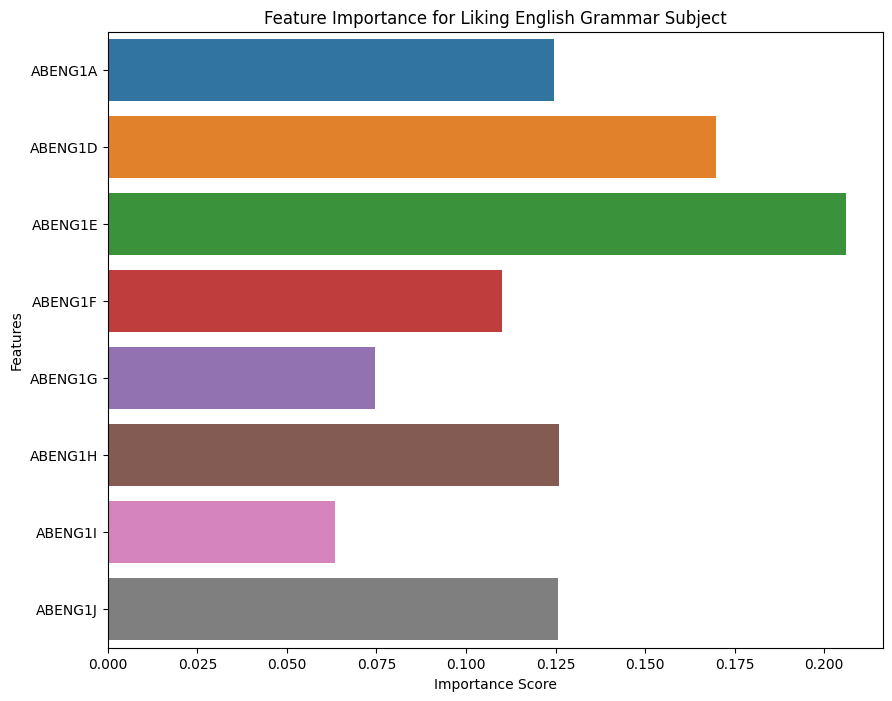

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- English Litreature Analysis ---
[[258   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  89  24  11   0   6]
 [  0   2   0  34  29  18   4   4]
 [  0   1   0   7  28  12   3   5]
 [  0   0   0   5   3   5   4   5]
 [  0   0   0  16   9   6   0  24]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       258
         -98       0.25      1.00      0.40         1
         -95       1.00      1.00      1.00       576
           1       0.59      0.68      0.63       130
           2       0.31      0.32      0.32        91
           3       0.23      0.21      0.22        56
           4       0.36      0.18      0.24        22
           5       0.55      0.44      0.48        55

    accuracy                           0.84      1189
   macro avg       0.54      0.60      0.54      1189
weighted avg       0.83      0.84      0.83      1189

Accuracy: 0.84


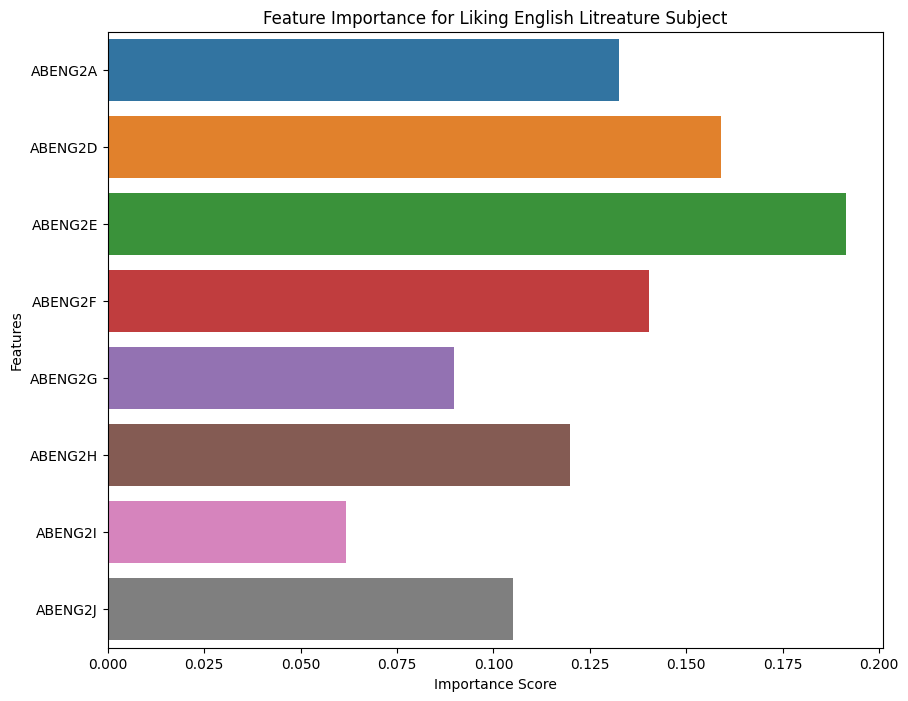

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Social Science Analysis ---
[[ 18   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 145  43  19   0  11]
 [  0   0   0  61  51  33   6   9]
 [  0   1   0  20  36  35   4  11]
 [  0   0   0   6   6  10   2   8]
 [  0   1   0  18   7   8   3  38]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00        18
         -98       0.20      1.00      0.33         1
         -95       1.00      1.00      1.00       576
           1       0.58      0.66      0.62       220
           2       0.36      0.32      0.34       160
           3       0.33      0.33      0.33       107
           4       0.13      0.06      0.09        32
           5       0.49      0.51      0.50        75

    accuracy                           0.73      1189
   macro avg       0.51      0.61      0.53      1189
weighted avg       0.72      0.73      0.72      1189

Accuracy: 0.73


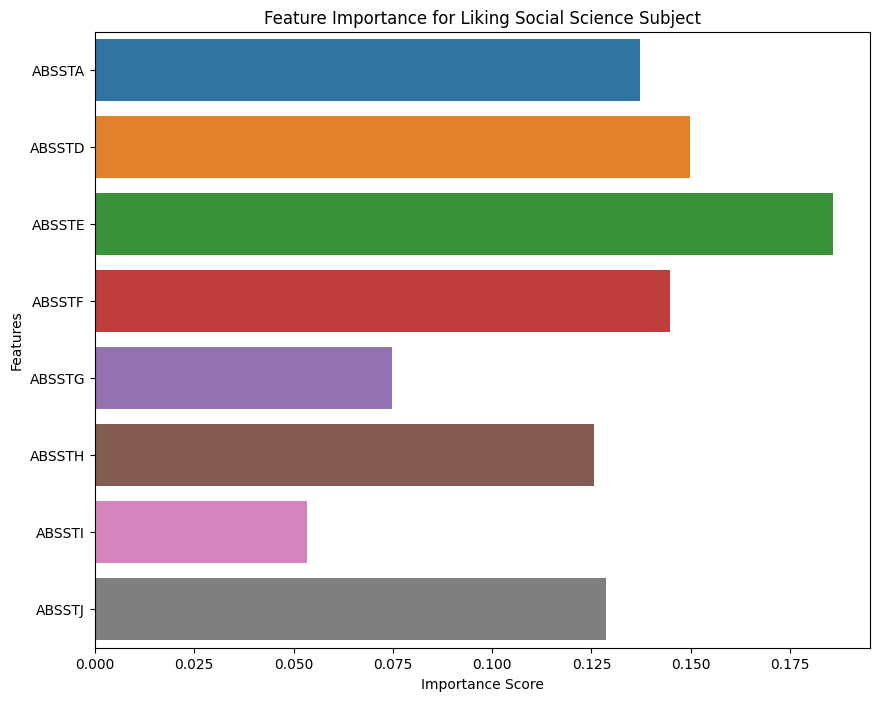

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Computer Analysis ---
[[549   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  35   3   0   1   0]
 [  0   0   0   5   3   0   1   2]
 [  0   0   0   3   1   2   0   0]
 [  0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   0   0   3]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       549
         -98       1.00      1.00      1.00         2
         -95       1.00      1.00      1.00       576
           1       0.78      0.90      0.83        39
           2       0.38      0.27      0.32        11
           3       1.00      0.33      0.50         6
           4       0.00      0.00      0.00         2
           5       0.60      0.75      0.67         4

    accuracy                           0.98      1189
   macro avg       0.72      0.66      0.66      1189
weighted avg       0.98      0.98      0.98      1189

Accuracy: 0.98


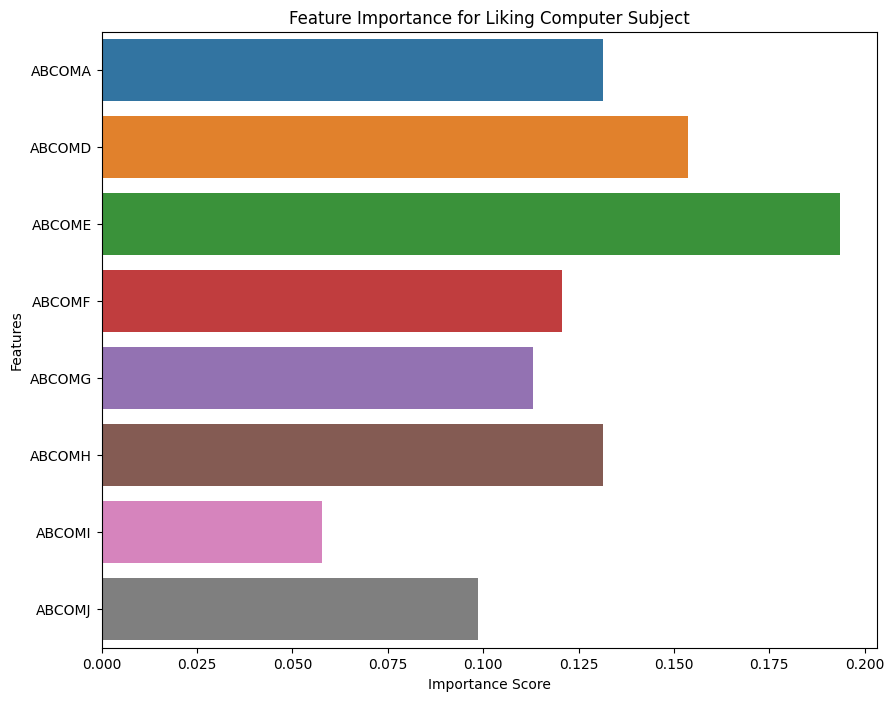

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Foreign Language Analysis ---
[[520   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  41   9   0   0   2]
 [  0   0   0   5   6   2   0   2]
 [  0   0   0   1   5   2   0   1]
 [  0   0   0   2   3   0   0   1]
 [  0   0   0   0   1   1   0   8]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       520
         -98       1.00      1.00      1.00         1
         -95       1.00      1.00      1.00       576
           1       0.84      0.79      0.81        52
           2       0.25      0.40      0.31        15
           3       0.40      0.22      0.29         9
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        10

    accuracy                           0.97      1189
   macro avg       0.63      0.65      0.63      1189
weighted avg       0.97      0.97      0.97      1189

Accuracy: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


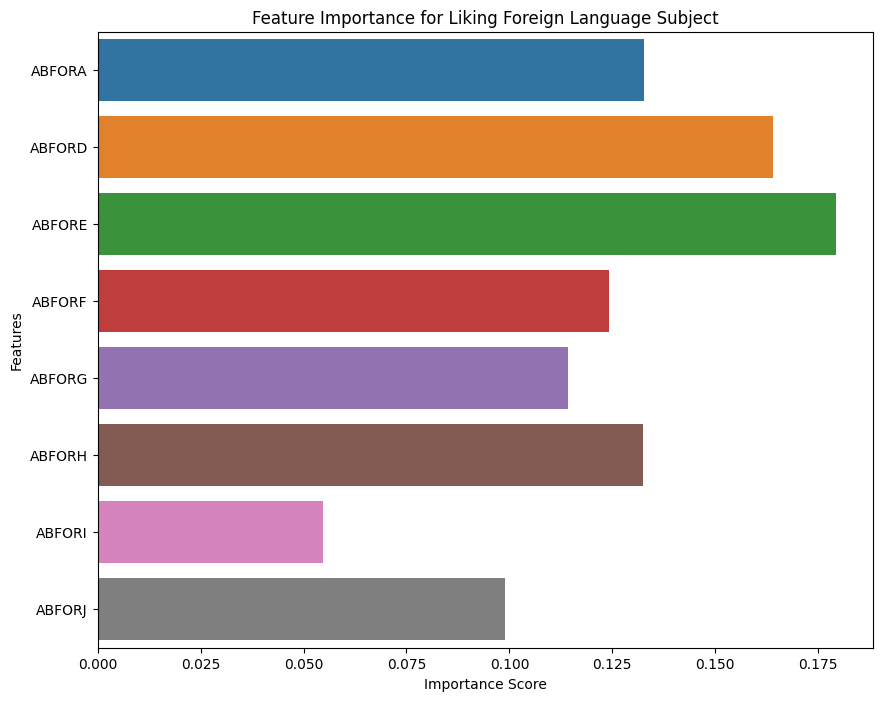

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Art Analysis ---
[[451   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   5   0  68  11   5   0   2]
 [  0   0   0  19   8   3   0   1]
 [  0   0   0   8   4   4   0   1]
 [  0   0   0   2   0   0   2   1]
 [  0   0   0   8   3   2   2   2]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       451
         -98       0.17      1.00      0.29         1
         -95       1.00      1.00      1.00       576
           1       0.65      0.75      0.69        91
           2       0.31      0.26      0.28        31
           3       0.29      0.24      0.26        17
           4       0.50      0.40      0.44         5
           5       0.29      0.12      0.17        17

    accuracy                           0.94      1189
   macro avg       0.52      0.59      0.52      1189
weighted avg       0.93      0.94      0.93      1189

Accuracy: 0.94


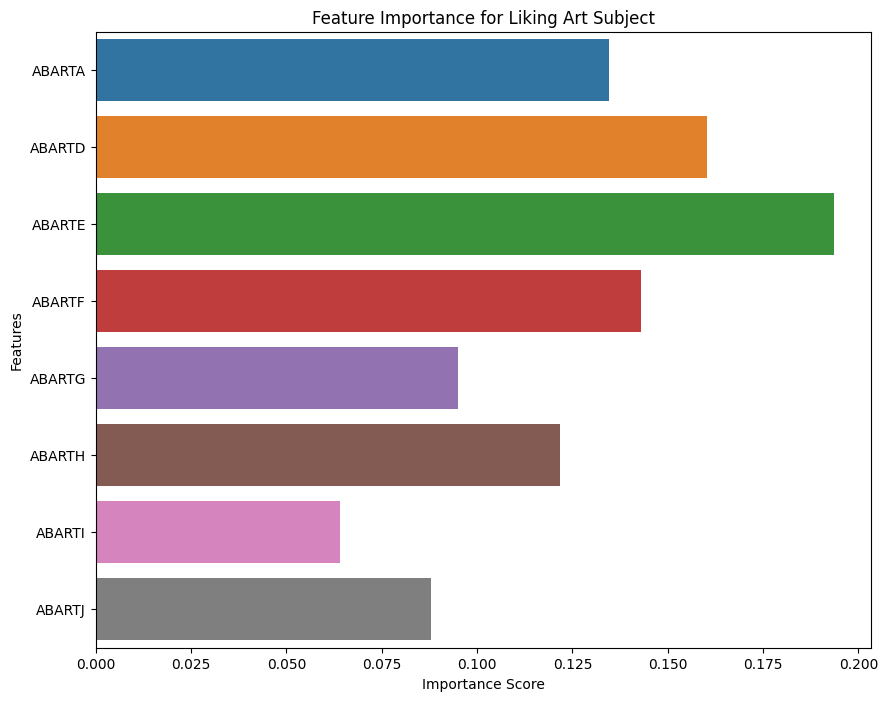

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Music/Dance Analysis ---
[[327   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0 117  16   2   3   1]
 [  0   0   0  46  19   7   4   3]
 [  0   1   0  15   7  10   1   4]
 [  0   0   0   2   4   1   4   2]
 [  0   0   0   6   2   0   3   5]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       327
         -98       0.00      0.00      0.00         1
         -95       1.00      1.00      1.00       576
           1       0.63      0.84      0.72       139
           2       0.40      0.24      0.30        79
           3       0.50      0.26      0.34        38
           4       0.27      0.31      0.29        13
           5       0.33      0.31      0.32        16

    accuracy                           0.89      1189
   macro avg       0.52      0.50      0.50      1189
weighted avg       0.88      0.89      0.88      1189

Accuracy: 0.89


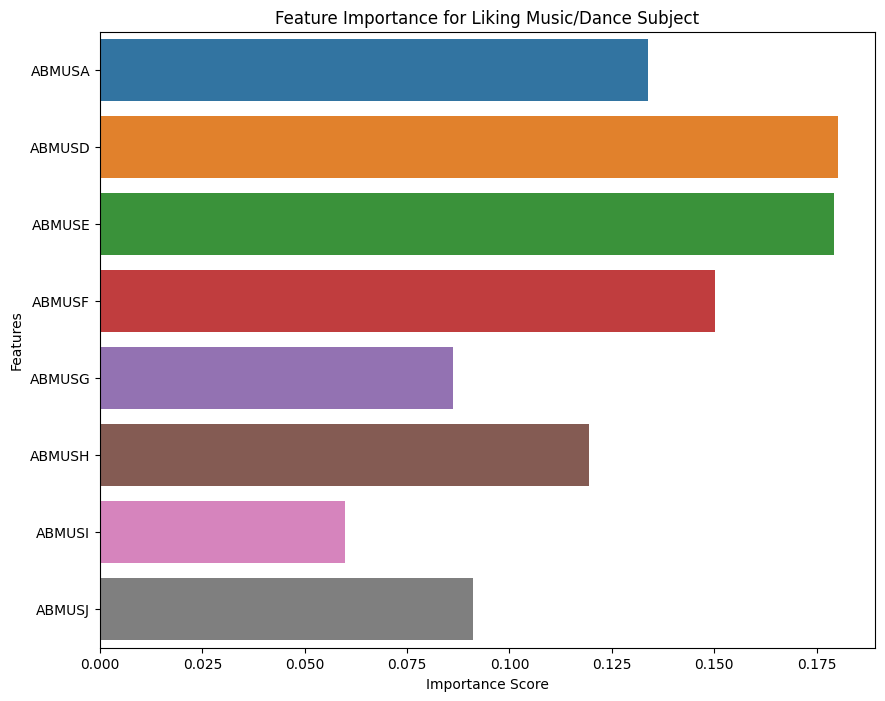

/tmp/ipykernel_34/1136298180.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Vocational/Commerce Analysis ---
[[379   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  91  14   3   2   4]
 [  0   0   0  37  11   8   0   0]
 [  0   0   0  19   5   3   0   1]
 [  0   0   0   0   4   2   3   3]
 [  0   2   0   3   1   3   1   7]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       379
         -98       0.78      1.00      0.88         7
         -95       1.00      1.00      1.00       576
           1       0.61      0.80      0.69       114
           2       0.31      0.20      0.24        56
           3       0.16      0.11      0.13        28
           4       0.50      0.25      0.33        12
           5       0.47      0.41      0.44        17

    accuracy                           0.91      1189
   macro avg       0.60      0.60      0.59      1189
weighted avg       0.90      0.91      0.90      1189

Accuracy: 0.91


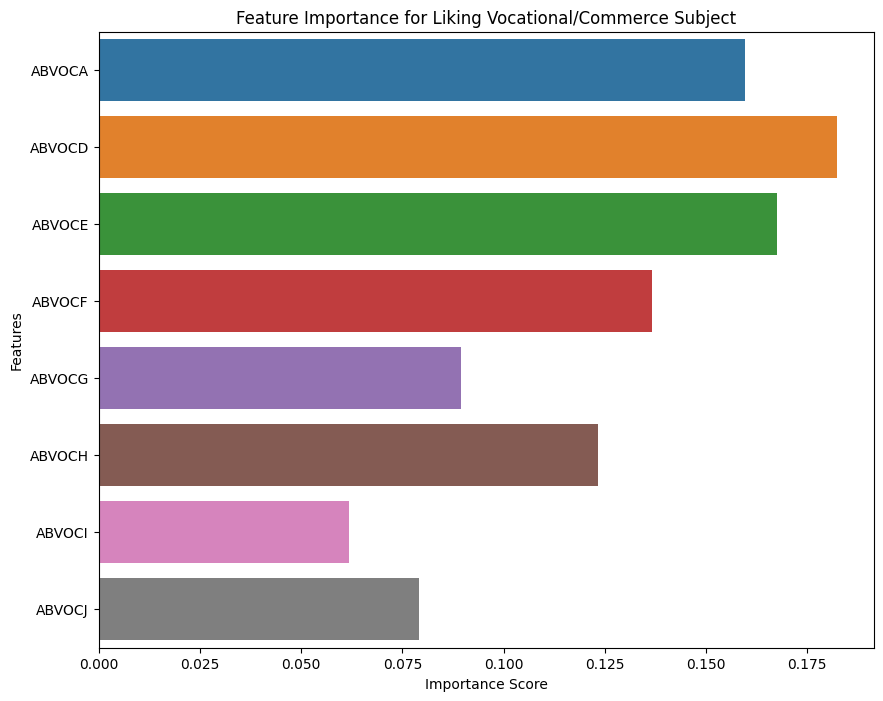

In [20]:
for subject, variables in subject_vars.items():
    analyze_subject(data, subject, variables)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [23]:
def analyze_subject_choice(data, subject, variables):
    # Filter the dataset to include only the important variables
    filtered_data = data[variables]

    # Encode categorical variables
    label_encoders = {}
    for column in filtered_data.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column].astype(str))

    # Handle missing values (e.g., fill with the median value)
    filtered_data.fillna(filtered_data.median(), inplace=True)

    # Define X and y
    X = filtered_data.drop(f'{variables[1]}', axis=1)
    y = filtered_data[f'{variables[1]}']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)
    y_proba = rf_model.predict_proba(X_test)[:, 1]

    # Evaluation
    print(f'--- {subject} Analysis ---')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Feature importance
    feature_importances = rf_model.feature_importances_
    features = X.columns

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importances, y=features)
    plt.title(f'Feature Importance for Choosing {subject} Subject')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

    # Predict the number of students likely to take the subject
    prob_threshold = 0.5
    predicted_choices = (y_proba > prob_threshold).sum()
    print(f'Predicted number of students likely to take {subject}: {predicted_choices}')

    return y_proba, y_test


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Math Analysis ---
[[  1   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   1   0 228  40  16   1  11]
 [  0   2   0  78  50  18   5   8]
 [  0   0   0  22  23  22   2   8]
 [  0   0   0   7   8   8   1   2]
 [  0   0   0  22   6   2   0  15]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00         1
         -98       0.67      1.00      0.80         6
         -95       1.00      1.00      1.00       576
           1       0.64      0.77      0.70       297
           2       0.39      0.31      0.35       161
           3       0.33      0.29      0.31        77
           4       0.11      0.04      0.06        26
           5       0.34      0.33      0.34        45

    accuracy                           0.76      1189
   macro avg       0.56      0.59      0.57      1189
weighted avg       0.74      0.76      0.74      1189

Accuracy: 0.76


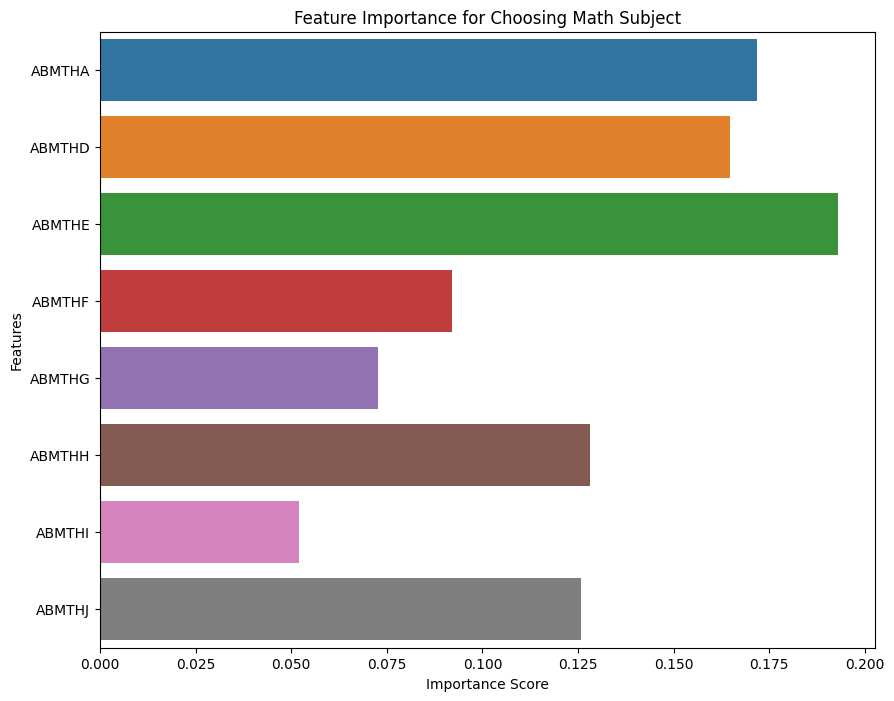

Predicted number of students likely to take Math: 9


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Science Analysis ---
[[ 60   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 188  33  11   2   9]
 [  0   2   0  55  45  28   1   7]
 [  0   0   0  20  32  20   6   5]
 [  0   0   0   5  11   7   2   4]
 [  0   1   0  11  11   9   2  19]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00        60
         -98       0.50      1.00      0.67         5
         -95       1.00      1.00      1.00       576
           1       0.67      0.77      0.72       245
           2       0.34      0.33      0.33       138
           3       0.27      0.24      0.25        83
           4       0.15      0.07      0.10        29
           5       0.43      0.36      0.39        53

    accuracy                           0.77      1189
   macro avg       0.55      0.60      0.56      1189
weighted avg       0.76      0.77      0.76      1189

Accuracy: 0.77


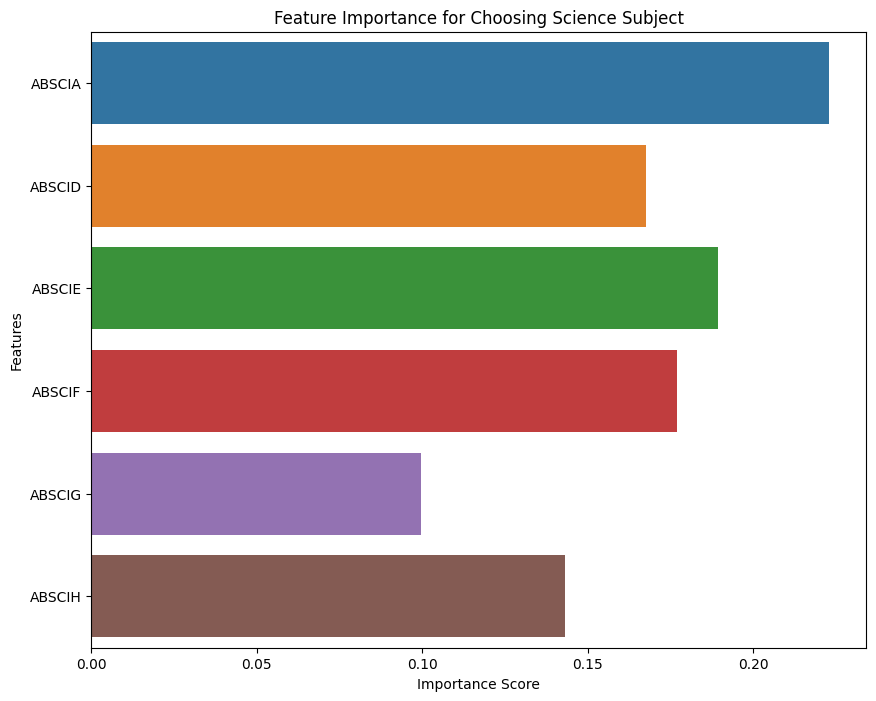

Predicted number of students likely to take Science: 6


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- English Grammar Analysis ---
[[  6   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 134  48  16   2   3]
 [  0   1   0  51  80  29   1   7]
 [  0   0   0  19  41  36   7   5]
 [  0   0   0   6   9   9   2  10]
 [  0   0   0  31  14  16   3  23]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00         6
         -98       0.40      1.00      0.57         2
         -95       1.00      1.00      1.00       576
           1       0.56      0.65      0.60       205
           2       0.42      0.47      0.44       169
           3       0.34      0.33      0.34       108
           4       0.13      0.06      0.08        36
           5       0.48      0.26      0.34        87

    accuracy                           0.72      1189
   macro avg       0.54      0.60      0.55      1189
weighted avg       0.72      0.72      0.71      1189

Accuracy: 0.72


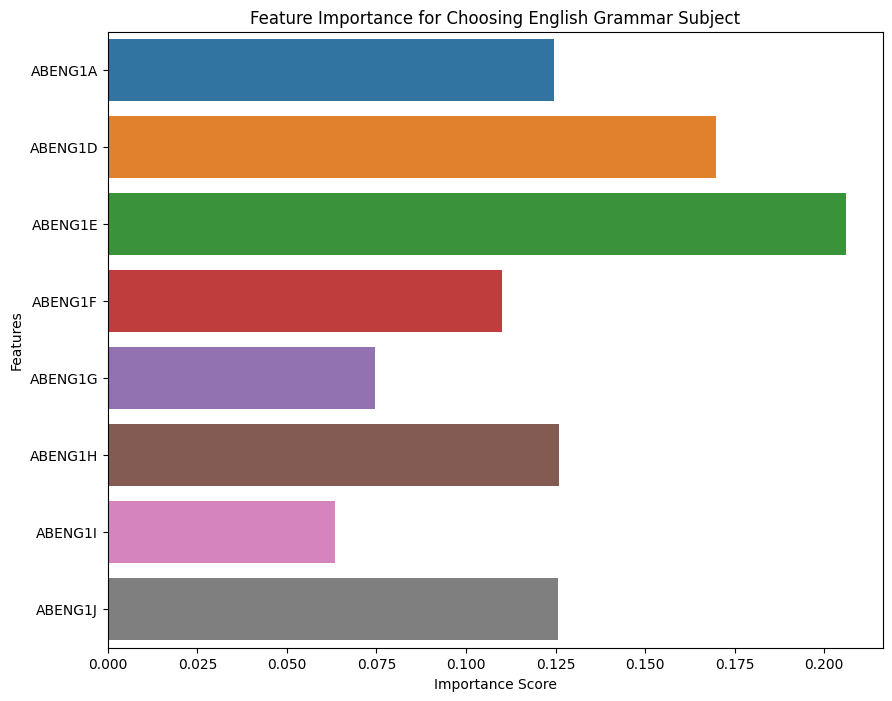

Predicted number of students likely to take English Grammar: 3


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- English Litreature Analysis ---
[[258   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  89  24  11   0   6]
 [  0   2   0  34  29  18   4   4]
 [  0   1   0   7  28  12   3   5]
 [  0   0   0   5   3   5   4   5]
 [  0   0   0  16   9   6   0  24]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       258
         -98       0.25      1.00      0.40         1
         -95       1.00      1.00      1.00       576
           1       0.59      0.68      0.63       130
           2       0.31      0.32      0.32        91
           3       0.23      0.21      0.22        56
           4       0.36      0.18      0.24        22
           5       0.55      0.44      0.48        55

    accuracy                           0.84      1189
   macro avg       0.54      0.60      0.54      1189
weighted avg       0.83      0.84      0.83      1189

Accuracy: 0.84


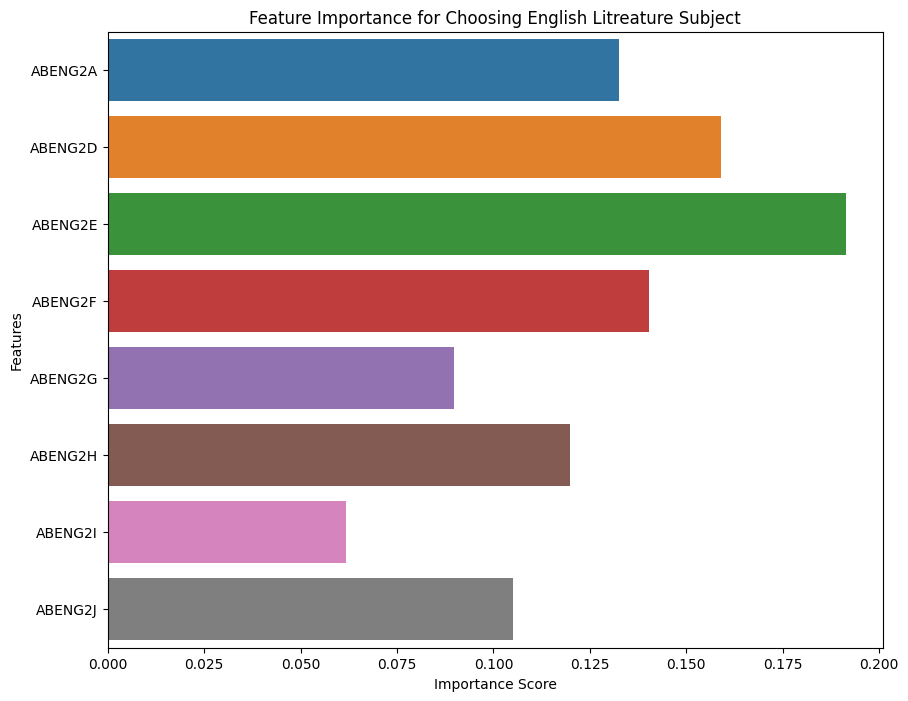

Predicted number of students likely to take English Litreature: 1


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Social Science Analysis ---
[[ 18   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   2   0 145  43  19   0  11]
 [  0   0   0  61  51  33   6   9]
 [  0   1   0  20  36  35   4  11]
 [  0   0   0   6   6  10   2   8]
 [  0   1   0  18   7   8   3  38]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00        18
         -98       0.20      1.00      0.33         1
         -95       1.00      1.00      1.00       576
           1       0.58      0.66      0.62       220
           2       0.36      0.32      0.34       160
           3       0.33      0.33      0.33       107
           4       0.13      0.06      0.09        32
           5       0.49      0.51      0.50        75

    accuracy                           0.73      1189
   macro avg       0.51      0.61      0.53      1189
weighted avg       0.72      0.73      0.72      1189

Accuracy: 0.73


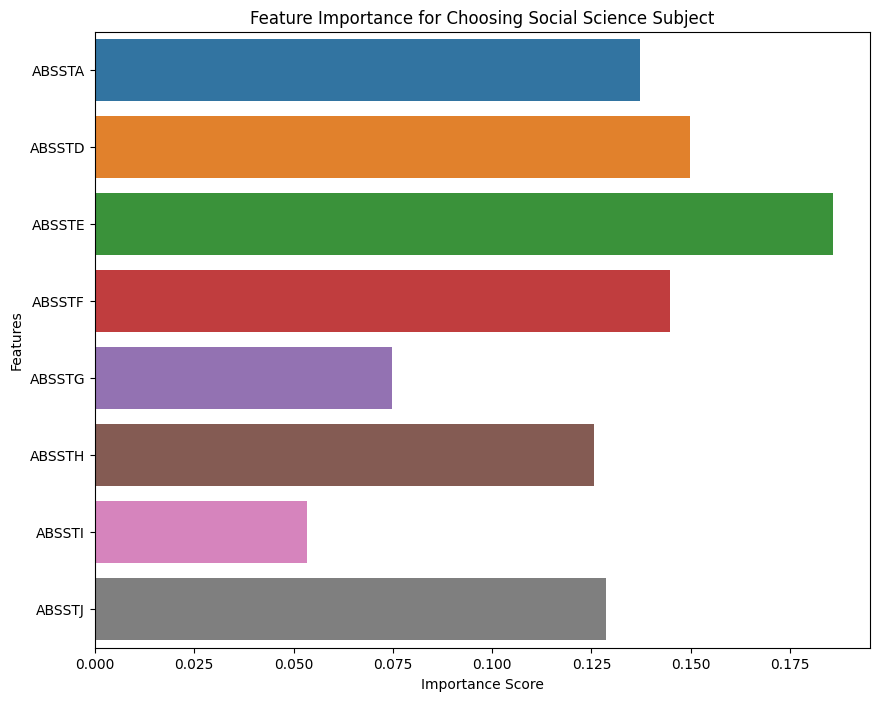

Predicted number of students likely to take Social Science: 5


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Computer Analysis ---
[[549   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  35   3   0   1   0]
 [  0   0   0   5   3   0   1   2]
 [  0   0   0   3   1   2   0   0]
 [  0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   0   0   3]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       549
         -98       1.00      1.00      1.00         2
         -95       1.00      1.00      1.00       576
           1       0.78      0.90      0.83        39
           2       0.38      0.27      0.32        11
           3       1.00      0.33      0.50         6
           4       0.00      0.00      0.00         2
           5       0.60      0.75      0.67         4

    accuracy                           0.98      1189
   macro avg       0.72      0.66      0.66      1189
weighted avg       0.98      0.98      0.98      1189

Accuracy: 0.98


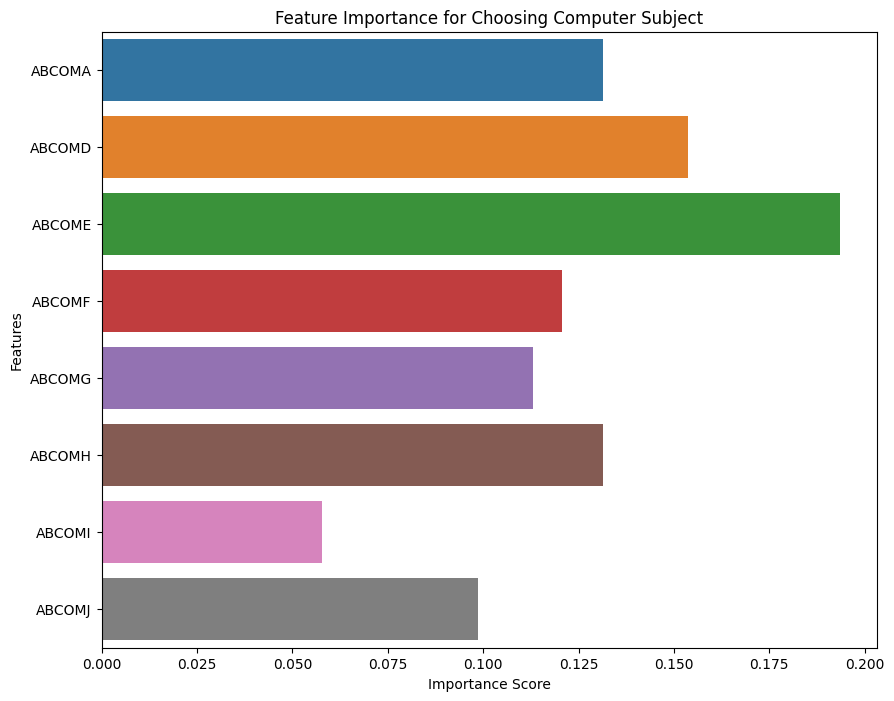

Predicted number of students likely to take Computer: 2


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Foreign Language Analysis ---
[[520   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  41   9   0   0   2]
 [  0   0   0   5   6   2   0   2]
 [  0   0   0   1   5   2   0   1]
 [  0   0   0   2   3   0   0   1]
 [  0   0   0   0   1   1   0   8]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       520
         -98       1.00      1.00      1.00         1
         -95       1.00      1.00      1.00       576
           1       0.84      0.79      0.81        52
           2       0.25      0.40      0.31        15
           3       0.40      0.22      0.29         9
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        10

    accuracy                           0.97      1189
   macro avg       0.63      0.65      0.63      1189
weighted avg       0.97      0.97      0.97      1189

Accuracy: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


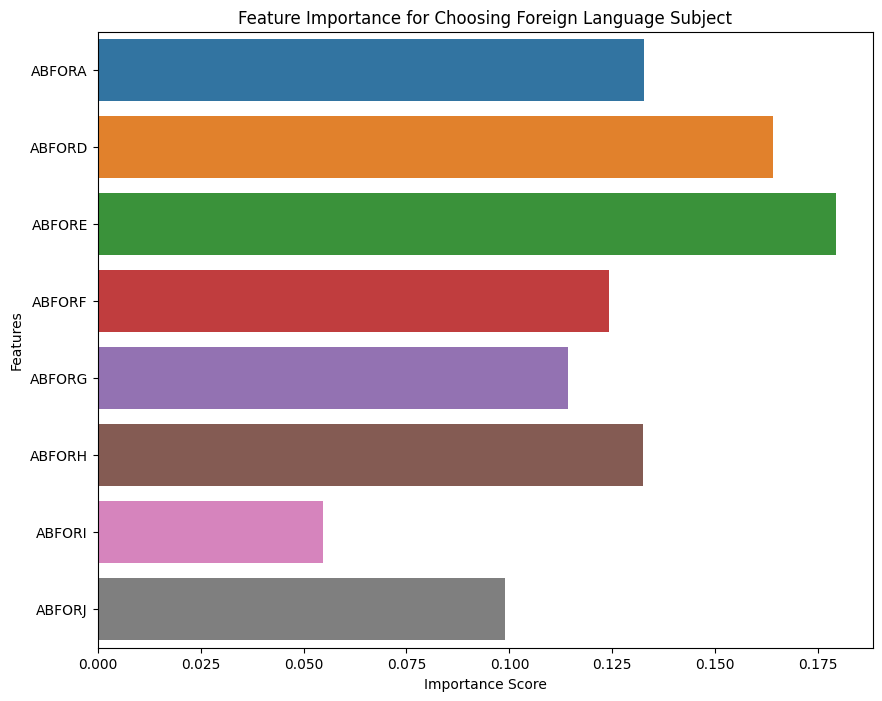

Predicted number of students likely to take Foreign Language: 1


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Art Analysis ---
[[451   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   5   0  68  11   5   0   2]
 [  0   0   0  19   8   3   0   1]
 [  0   0   0   8   4   4   0   1]
 [  0   0   0   2   0   0   2   1]
 [  0   0   0   8   3   2   2   2]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       451
         -98       0.17      1.00      0.29         1
         -95       1.00      1.00      1.00       576
           1       0.65      0.75      0.69        91
           2       0.31      0.26      0.28        31
           3       0.29      0.24      0.26        17
           4       0.50      0.40      0.44         5
           5       0.29      0.12      0.17        17

    accuracy                           0.94      1189
   macro avg       0.52      0.59      0.52      1189
weighted avg       0.93      0.94      0.93      1189

Accuracy: 0.94


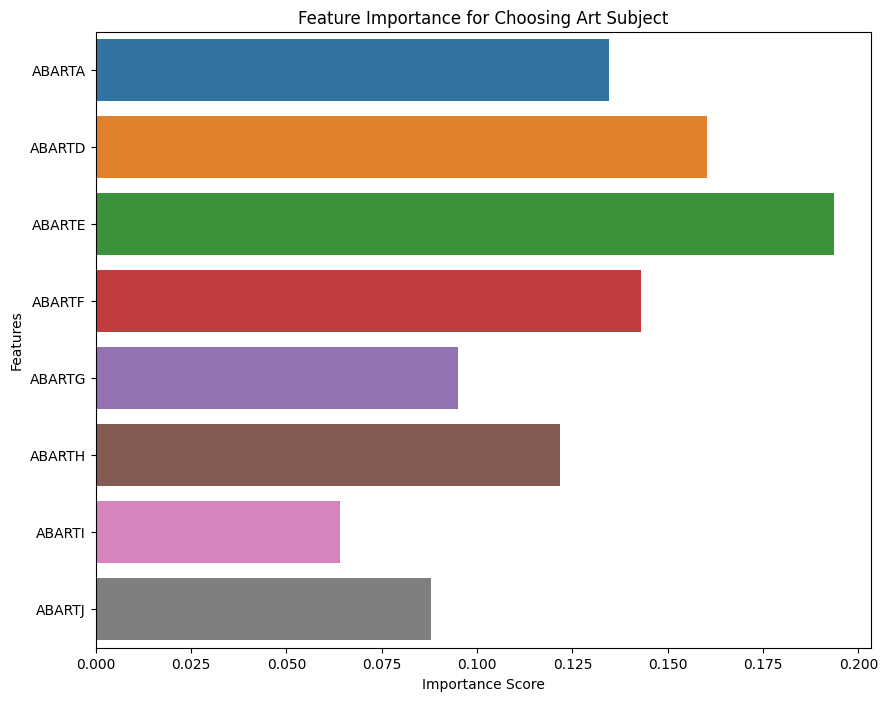

Predicted number of students likely to take Art: 3


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Music/Dance Analysis ---
[[327   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0 117  16   2   3   1]
 [  0   0   0  46  19   7   4   3]
 [  0   1   0  15   7  10   1   4]
 [  0   0   0   2   4   1   4   2]
 [  0   0   0   6   2   0   3   5]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       327
         -98       0.00      0.00      0.00         1
         -95       1.00      1.00      1.00       576
           1       0.63      0.84      0.72       139
           2       0.40      0.24      0.30        79
           3       0.50      0.26      0.34        38
           4       0.27      0.31      0.29        13
           5       0.33      0.31      0.32        16

    accuracy                           0.89      1189
   macro avg       0.52      0.50      0.50      1189
weighted avg       0.88      0.89      0.88      1189

Accuracy: 0.89


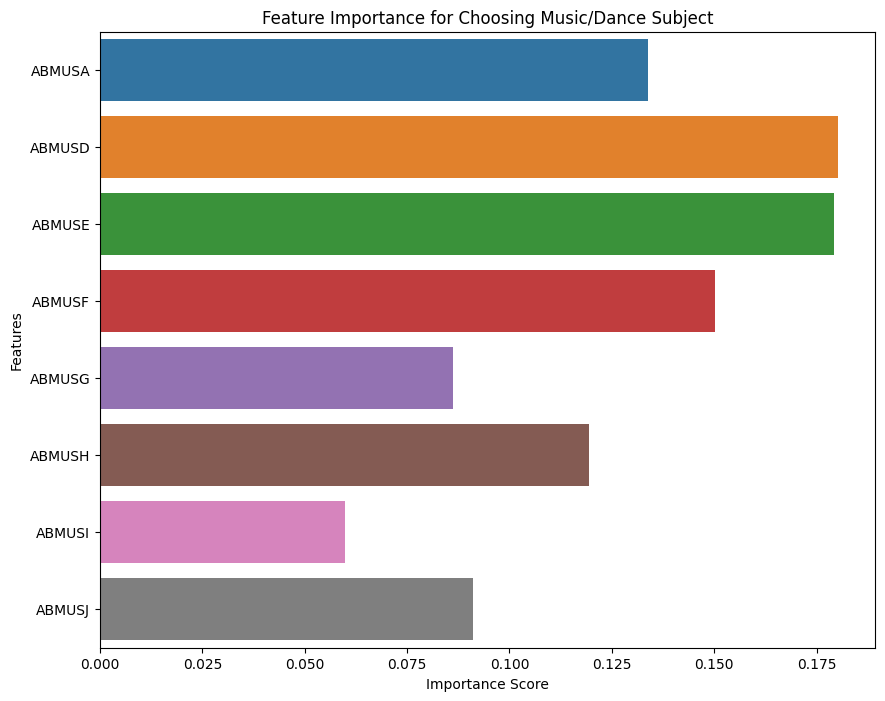

Predicted number of students likely to take Music/Dance: 0


/tmp/ipykernel_34/2215691479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(filtered_data.median(), inplace=True)


--- Vocational/Commerce Analysis ---
[[379   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0]
 [  0   0 576   0   0   0   0   0]
 [  0   0   0  91  14   3   2   4]
 [  0   0   0  37  11   8   0   0]
 [  0   0   0  19   5   3   0   1]
 [  0   0   0   0   4   2   3   3]
 [  0   2   0   3   1   3   1   7]]
              precision    recall  f1-score   support

         -99       1.00      1.00      1.00       379
         -98       0.78      1.00      0.88         7
         -95       1.00      1.00      1.00       576
           1       0.61      0.80      0.69       114
           2       0.31      0.20      0.24        56
           3       0.16      0.11      0.13        28
           4       0.50      0.25      0.33        12
           5       0.47      0.41      0.44        17

    accuracy                           0.91      1189
   macro avg       0.60      0.60      0.59      1189
weighted avg       0.90      0.91      0.90      1189

Accuracy: 0.91


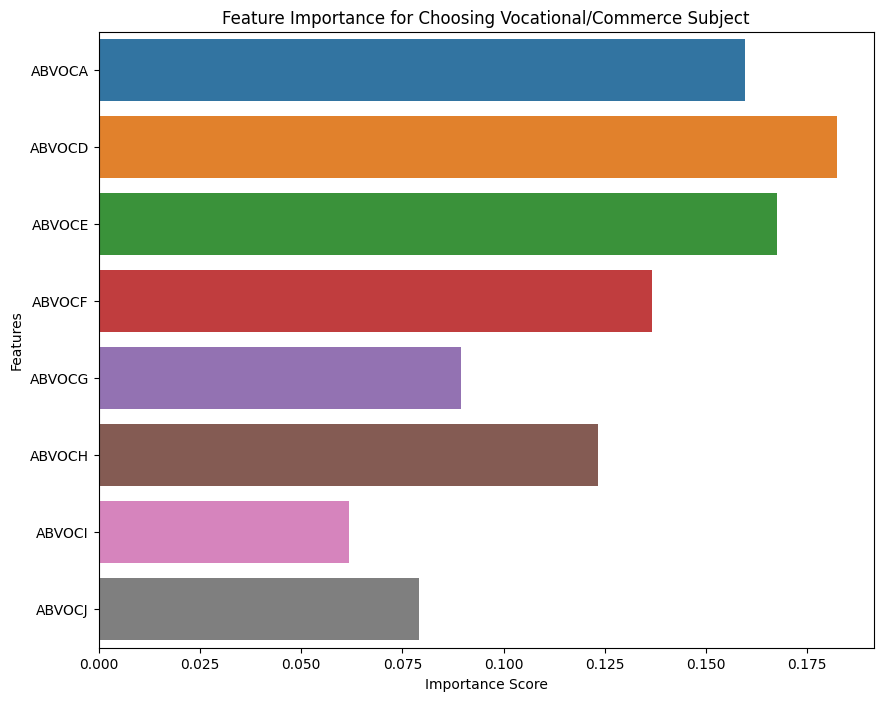

Predicted number of students likely to take Vocational/Commerce: 9


In [24]:
all_probabilities = {}
for subject, variables in subject_vars.items():
    probabilities, true_labels = analyze_subject_choice(data, subject, variables)
    all_probabilities[subject] = (probabilities, true_labels)
